In [7]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet, mobilenet
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.preprocessing import image as keras_image
import numpy as np
from IPython.display import Image, display


In [8]:
def load_image(img_path):
    img = keras_image.load_img(img_path, target_size=(224, 224))
    img_array = np.expand_dims(keras_image.img_to_array(img), axis=0)
    return mobilenet.preprocess_input(img_array)
    

In [9]:
def main():
    try:
        img_path = input("Enter the full path to your image: ")
        display(Image(img_path, width=300, height=200))
        img = load_image(img_path)
        model = MobileNet(weights='imagenet')
        predictions = model.predict(img)
        results = decode_predictions(predictions, top=2)[0]
        print(f"Predictions for your image '{img_path}':")
        for _, label, prob in results:
            print(f"{label}: {prob * 100:.3f}%")
    except Exception as e:
        print("An error occurred:", e)




Enter the full path to your image:  sparrow.jpg


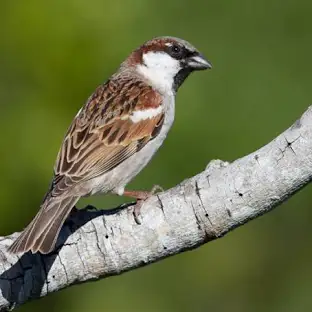

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions for your image 'sparrow.jpg':
bulbul: 76.786%
coucal: 12.467%


In [10]:
if __name__ == "__main__":
    main()